A neural network needs these three functions:

*   Initialization function: Set number of input, hidden, and output nodes.
*   Training function: Refine the weights after recieving a training set to learn from.
*   Query function: Output an answer from output nodes after given input.



### Imports

In [0]:
# Import numpy for random weight assignment and matrix operations:
import numpy

# Import scipy.special for our sigmoid function for activation:
import scipy.special

### Neural Network Class Definition

In [0]:
# Neural network class definition
class neuralNetwork:
  
  
  # Initialization Function: Initialize the neural network
  '''
  Defining the number of input, hidden, and output layer nodes will define the 
  shape and size of the neural network. To keep this generalizable, we allow this
  function to take in parameters to define the neural network object. We also 
  include the learning rate as a parameter.
  
  '''
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    
    
    # Set number of nodes in each input, hidden, and output layer:
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes
    
    
    # Link weights; "The 'heart' of the neural network"
    '''
    Link weights are used for calculate the signal being fed forward and the 
    error as the signal propagates backwards. The link weights themselves are 
    refined in an attempt to improve the network.
    
    "wih" = A matrix for the weights for links between the input and hidden 
    layers, W of input_hidden, of size = (hidden_nodes by input_nodes).
    
    "who" = A matrix for the links between the hidden and output layers, W of 
    hidden_output, of size = (output_nodes by hidden_nodes).
    
    '''
    
    
    # Create the initial weight matrices:
    '''
    Weights inside the arrays are w_i_j, where link from node i to node j in 
    the next layer:
    
        w11 w21
        w12 w22, etc
        
    Using numpy.random.normal allows us to sample a normal distribution centered
    around 0.0 with a standard deviation of -0.5. The third parameter is the sample 
    size that we want given by the size of the network.
        
    '''
    self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = numpy.random.normal(1.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
    
    
    # Activation function: Sigmoid
    '''
    The sigmoid function is called "expit" in numpy. We define the activation 
    function in the initialization function so it only needs to be changed once
    if any changes need to be made.
    
    '''
    self.activation_function = lambda x: scipy.special.expit(x)
    
    # Set learning rate
    self.lr = learningrate

    pass

  
  
  ##############################################################################
  
  # Training Function: Train the neural network
  '''
  Two phases to training process:
    1. Calculate the output for given training set (just like how query() does).
    2. Backpropagating the errors to inform how the link weights  are refined.
 
  '''
  def train(self, inputs_list, targets_list):
    
    # Part 1: Calculate output:
    ''' 
    Unlike query(), we have an additional parameter, targets_list, in the train() 
    function. You can't train the network without the training examples that 
    include the desired or target answer.
    
    '''
    
    # Convert inputs into a 2D array:
    inputs = numpy.array(inputs_list, ndmin = 2).T
    targets = numpy.array(targets_list, ndmin = 2).T
    
    
    # Calculate signals into hidden layer:
    hidden_inputs = numpy.dot(self.wih, inputs)
    
    
    # Calculate the signals emerging from the hidden layer:
    hidden_outputs = self.activation_function(hidden_inputs)
    
    
    # Calculate the signals into final output layer:
    final_inputs = numpy.dot(self.who, hidden_outputs)
    
    
    # Calculate the signals emerging from final output layer:
    final_outputs = self.activation_function(final_inputs)
    
    
    # Part 2: Error calculation:
    '''
    Take the calculated output and compare it with the desired output. Record 
    the difference and use it to guide updating the network weights. We use 
    these are the errors between the hidden layers and final layers.

    '''
    # Error = (target - actual):
    output_errors = targets - final_outputs
    
    
    # Hidden layer error:
    '''
    Hidden layer error is the output_errors, split by weights, and recombined 
    at hidden nodes. We use these as the errors between the input layers 
    and hidden layers.
    
    '''
    hidden_errors = numpy.dot(self.who.T, output_errors)
    
   
    # Update the weights for the links between the hidden and output layers:
    '''
    +=                  Increase the preceding variable by the next amount.
    
    self.lr             Learning rate or alpha. Gets multiplied with the rest 
                        of the expression.
                        
    numpy.dot()         Performs matrix dot product on related error and sigmoids 
                        from the next layer.
      
    The code for the other weights will be very similar.
    
    '''
    self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
                                    numpy.transpose(hidden_outputs))
    
    
    # Update the weights for the links between the hidden and output layers:
    self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                   numpy.transpose(hidden_outputs))
    
    
    # Update the weights for the links between the input and hidden layers:
    self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                   numpy.transpose(inputs))
    
    pass
 


  ##############################################################################
  
  # Query Function: Query the neural network
  '''
  The query() function takes the input and returns the network's output. Input 
  signals need to be passed all the way through the input layer and hidden layers.
  The query() function ONLY needs the inputs_list. 
  
  '''
  def query(self, inputs_list):
    
    
    # First convert inputs list into a 2D array:
    inputs = numpy.array(inputs_list, ndmin = 2).T
    
    
    # The line of code that does all the work:    
    '''
    This line combines all the inputs with all the right link weights to produce 
    the matrix of combined moderated signals into each hidden layer node
    
    '''
    hidden_inputs = numpy.dot(self.wih, inputs)
    
    
    # Calculate the signals emerging from the hidden layer:
    '''
    A matrix called hidden_outputs contains the signals emerging from the hidden 
    layer nodes.
    
    '''
    hidden_outputs = self.activation_function(hidden_inputs)
    
    
    # Calculate signals into the final output layer:
    '''
    To go from the last hidden layer to the final layer, the process isn't very
    different from the previous ones.
    
    '''
    final_inputs = numpy.dot(self.who,hidden_outputs)
    
    
    # Calculate signals emerging from the final output layer:
    '''
    Same as above, essentially.
    
    '''
    final_outputs = self.activation_function(final_inputs)
    
    
    # Return the final_outputs:
    return final_outputs
  
 

### Small test

Testing with a small neural network object:

In [0]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3
learning_rate = 0.3
n_test = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# Example query with random input:
n_test.query([1.0,0.5,-1.5])

array([[0.67792738],
       [0.61237712],
       [0.66237326]])

### Character Classification Test 

In [0]:
from google.colab import files

import matplotlib.pyplot
%matplotlib inline

In [0]:
# Number of input, hidden, and output nodes:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# Set learning rate:
learning_rate = 0.3

# Create instance of neural network:
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [0]:
# Upload file:
data_file = files.upload()

# Load the MNIST training data CSV file into a list
training_data_file = open('mnist_train_100.csv', "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

Saving mnist_train_100.csv to mnist_train_100 (5).csv


In [0]:
# Prep data and train the neural network 

# Go through records in the training data set:
for record in training_data_list:
  
  # Split record by commas:
  all_values = record.split(',')
  
  # Scale and shift inputs
  inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  
  # Create target output values (all 0.01 except desired label which is 0.99):
  targets = numpy.zeros(output_nodes) + 0.01
  
  # all_targets[0] is the target label for this record
  targets[int(all_values[0])] = 0.99
  n.train(inputs, targets)
  pass

In [0]:
# Load the MNIST test data CSV file into a list:
test_data_file= files.upload()
test_data_file = open('mnist_test_10.csv', "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

Saving mnist_test_10.csv to mnist_test_10 (3).csv


In [0]:
# Get first test record:
all_values = test_data_list[0].split(',')

# Print the label:
print(all_values[0])

7


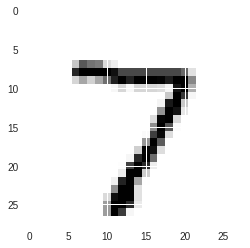

In [0]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap = 'Greys', interpolation = 'None')

In [0]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.50021045],
       [0.50011815],
       [0.50006415],
       [0.50014678],
       [0.50012425],
       [0.50009139],
       [0.50014358],
       [0.50010778],
       [0.50008339],
       [0.50016394]])

In [0]:
# Scorecard:

